AJOUT D'UN NOUVEAU DATASET A NOTRE ANALYSE : LOYERS
NOUS ALLONS PROCEDER DE LA MEME MANIERE QU'AVEC NOS AUTRES DATASETS :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
!pip install geopandas
import geopandas as gpd
from scipy.optimize import curve_fit
import seaborn as sns

from math import radians, cos, sin, asin, sqrt

!pip install basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 100.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.0 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
departements = gpd.read_file('/content/drive/MyDrive/French Industry/departements.geojson')
loyers = pd.read_csv('/content/drive/MyDrive/French Industry/loyers.csv', sep = ',')
entreprise = pd.read_csv('/content/drive/MyDrive/French Industry/base_etablissement_par_tranche_effectif.csv', sep = ',')
geo= pd.read_csv('/content/drive/MyDrive/French Industry/name_geographic_information.csv', sep = ',')

In [ ]:
loyers.head()

,departement,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison
0,1,1,L'Abergement-Clémenciat,2018,9.372335,8.191701
1,1,2,L'Abergement-de-Varey,2018,8.635552,7.441199
2,1,4,Ambérieu-en-Bugey,2018,10.074507,8.411184
3,1,5,Ambérieux-en-Dombes,2018,9.372335,9.039551
4,1,6,Ambléon,2018,8.966955,8.058265


In [ ]:
print(loyers.shape)

(70421, 6)


In [ ]:
loyers['date'].value_counts()

2018    35441
2022    34980
Name: date, dtype: int64

In [ ]:
loyers_appartement = loyers [['departement', 'id_ville', 'ville', 'date', 'loyer_m2_appartement']]

In [ ]:
loyers_appartement = loyers_appartement.loc[(loyers_appartement['date'] == 2018)]

In [ ]:
loyers_appartement.head()

,departement,id_ville,ville,date,loyer_m2_appartement
0,1,1,L'Abergement-Clémenciat,2018,9.372335
1,1,2,L'Abergement-de-Varey,2018,8.635552
2,1,4,Ambérieu-en-Bugey,2018,10.074507
3,1,5,Ambérieux-en-Dombes,2018,9.372335
4,1,6,Ambléon,2018,8.966955


In [ ]:
print(loyers_appartement.shape)

(35441, 5)


In [ ]:
loyers_appartement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35441 entries, 0 to 35440
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   departement           35441 non-null  object 
 1   id_ville              35441 non-null  int64  
 2   ville                 35441 non-null  object 
 3   date                  35441 non-null  int64  
 4   loyer_m2_appartement  35441 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ MB


In [ ]:
loyers_appartement = loyers_appartement[loyers_appartement["departement"].apply(lambda x: str(x).isdigit())]
loyers_appartement["departement"] = loyers_appartement["departement"].astype(int)

<ipython-input-12-263ae3d13bb9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
loyers_appartement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35081 entries, 0 to 35440
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   departement           35081 non-null  int64  
 1   id_ville              35081 non-null  int64  
 2   ville                 35081 non-null  object 
 3   date                  35081 non-null  int64  
 4   loyer_m2_appartement  35081 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ MB


In [ ]:
print('SALAIRE NET MOYEN : > 50 ans')
print("la valeur minimale est :", loyers_appartement['loyer_m2_appartement'].min())
print("la valeur maximale est :", loyers_appartement['loyer_m2_appartement'].max())
print("la valeur mediane est :", loyers_appartement['loyer_m2_appartement'].median(), '\n')

q1, q2, q3 = loyers_appartement['loyer_m2_appartement'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

SALAIRE NET MOYEN : > 50 ans
la valeur minimale est : 5.375503373
la valeur maximale est : 36.65443839
la valeur mediane est : 8.560025212 

les quartiles sont : q1 = 7.676384779  / q2 =  8.560025212  / q3 =  9.774472443 



In [ ]:
moyenne_X2 = loyers_appartement['loyer_m2_appartement'].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

Moyenne calculée avec la commande python:  8.986678916741942




In [ ]:
loyers_appartement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35081 entries, 0 to 35440
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   departement           35081 non-null  int64  
 1   id_ville              35081 non-null  int64  
 2   ville                 35081 non-null  object 
 3   date                  35081 non-null  int64  
 4   loyer_m2_appartement  35081 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ MB


In [ ]:
entreprise = entreprise[entreprise["CODGEO"].apply(lambda x: str(x).isdigit())]
entreprise["CODGEO"] = entreprise["CODGEO"].astype(int)
entreprise["DEP"] = entreprise["DEP"].astype(int)

<ipython-input-15-33e8fe2fe728>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-33e8fe2fe728>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
total_entreprise = entreprise[['CODGEO','LIBGEO', 'REG', 'DEP', 'E14TST']]

In [ ]:
total_entreprise_geo = total_entreprise.merge(geo, how = 'left', left_on = 'CODGEO', right_on = 'code_insee')

In [ ]:
loyers.rename(columns = {'ville' : 'LIBGEO'}, inplace = True)

In [ ]:
loyers_geo = loyers.merge(total_entreprise_geo, on = 'LIBGEO', how = 'inner') 

In [ ]:
# 1
geo["longitude"] = geo["longitude"].apply(lambda x: str(x).replace(',','.'))
# 2
mask = geo["longitude"] == '-'
geo.drop(geo[mask].index, inplace=True)
# 3
geo.dropna(subset = ["longitude", "latitude"], inplace=True)
# 4
geo["longitude"] = geo["longitude"].astype(float)

In [ ]:
geo.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

In [ ]:
def distance(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

def distance_bigger_than(limit, lon1, lat1, lon2, lat2):
    dist = distance(lon1, lat1, lon2, lat2)
    if dist > limit:
        return 0
    else:
        return 1

In [ ]:
# Extraction des coordonnées de Paris
paris_lat = geo.loc[geo['nom_commune'] == "Paris"].iloc[0]["latitude"]
paris_lon = geo.loc[geo['nom_commune'] == "Paris"].iloc[0]["longitude"]

# auxiliary list that will hold calculated values of PARIS_CLOSE
distances = []

# calculating values of PARIS_CLOSE
for index, row in geo.iterrows():
    distances.append(distance_bigger_than(30, row["longitude"], row["latitude"], paris_lon, paris_lat))

# adding new column to DataFrame
geo["PARIS_CLOSE"] = pd.Series(distances, index=geo.index)

In [ ]:
# extracting the coordinates of capitals of French provinces
majors =  geo[geo["nom_commune"] == geo["chef.lieu_région"]]
major_lats = majors["latitude"].tolist()
major_lons = majors["longitude"].tolist()

# auxiliary list that will hold calculated values of MAJOR_CITY_DISTANCE
distances = []

# calculating values of MAJOR_CITY_DISTANCE
for index, row in geo.iterrows():
    
    single_distances = []
    for lat, lon in zip(major_lats, major_lons):
        single_distances.append(int(distance(row["longitude"], row["latitude"], lon, lat)))
    
    distances.append(min(single_distances))

# adding new column to DataFrame
geo["MAJOR_CITY_DISTANCE"] = pd.Series(distances, index=geo.index)

In [ ]:
geo.head()

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement,PARIS_CLOSE,MAJOR_CITY_DISTANCE
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21,0,64
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91,0,79
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51,0,72
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.050000,1.71,0,70
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.400000,1.01,0,60


In [ ]:
departements.rename(columns = {'nom' : 'nom_département'}, inplace = True)

In [ ]:
loyers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85564 entries, 0 to 85563
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   departement             85564 non-null  object 
 1   id_ville                85564 non-null  int64  
 2   LIBGEO                  85564 non-null  object 
 3   date                    85564 non-null  int64  
 4   loyer_m2_appartement    85564 non-null  float64
 5   loyer_m2_maison         85564 non-null  float64
 6   CODGEO                  85564 non-null  int64  
 7   REG                     85564 non-null  int64  
 8   DEP                     85564 non-null  int64  
 9   E14TST                  85564 non-null  int64  
 10  EU_circo                85515 non-null  object 
 11  code_région             85515 non-null  float64
 12  nom_région              85515 non-null  object 
 13  chef.lieu_région        85515 non-null  object 
 14  numéro_département      85515 non-null

In [ ]:
departements.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   code             96 non-null     object  
 1   nom_département  96 non-null     object  
 2   geometry         96 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 2.4+ KB


In [ ]:
departements.head()

,code,nom_département,geometry
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ..."
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.41660 48.39907, ..."
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ..."
4,28,Eure-et-Loir,"POLYGON ((0.81483 48.67016, 0.82767 48.68072, ..."


In [ ]:
loyers_geo_group = loyers_geo.groupby("DEP").mean()
loyers_geo = departements.merge(loyers_geo, on="nom_département", how ='inner')

<ipython-input-30-f7a8c2abc549>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
loyers_geo_gr = loyers_geo.groupby("nom_département").mean()

<ipython-input-31-4b4b4218d315>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
loyers_geo_gr.dropna(subset = ["latitude"], inplace=True)

In [ ]:
loyers_geo_gr.head()

,id_ville,date,loyer_m2_appartement,loyer_m2_maison,CODGEO,REG,DEP,E14TST,code_région,numéro_circonscription,code_insee,latitude,éloignement
nom_département,,,,,,,,,,,,,
Ain,240.580612,2019.946939,9.759876,8.788741,1240.375510,82.0,1.0,79.732653,82.0,2.676531,1240.375510,46.087951,1.467476
Aisne,388.891271,2019.982644,8.963046,7.281537,2422.398162,22.0,2.0,26.322103,22.0,3.086779,2422.398162,49.559634,1.538384
Allier,186.748366,2019.986928,7.930537,6.702132,3163.693900,83.0,3.0,57.465142,83.0,2.620915,3163.693900,46.355523,1.524500
Alpes-Maritimes,108.827763,2019.994859,12.543349,12.254776,6083.285347,93.0,6.0,1269.817481,93.0,5.632391,6083.285347,43.844521,1.414521
Alpes-de-Haute-Provence,148.564516,2019.991935,9.549345,8.390098,4128.590726,93.0,4.0,68.514113,93.0,1.469758,4128.590726,44.068306,1.497166


In [ ]:
loyers_geo_gr.reset_index(level=0, inplace=True)

In [ ]:
loyers_geo_bis = loyers_geo_gr.merge(geo, on="nom_département", how ='inner')

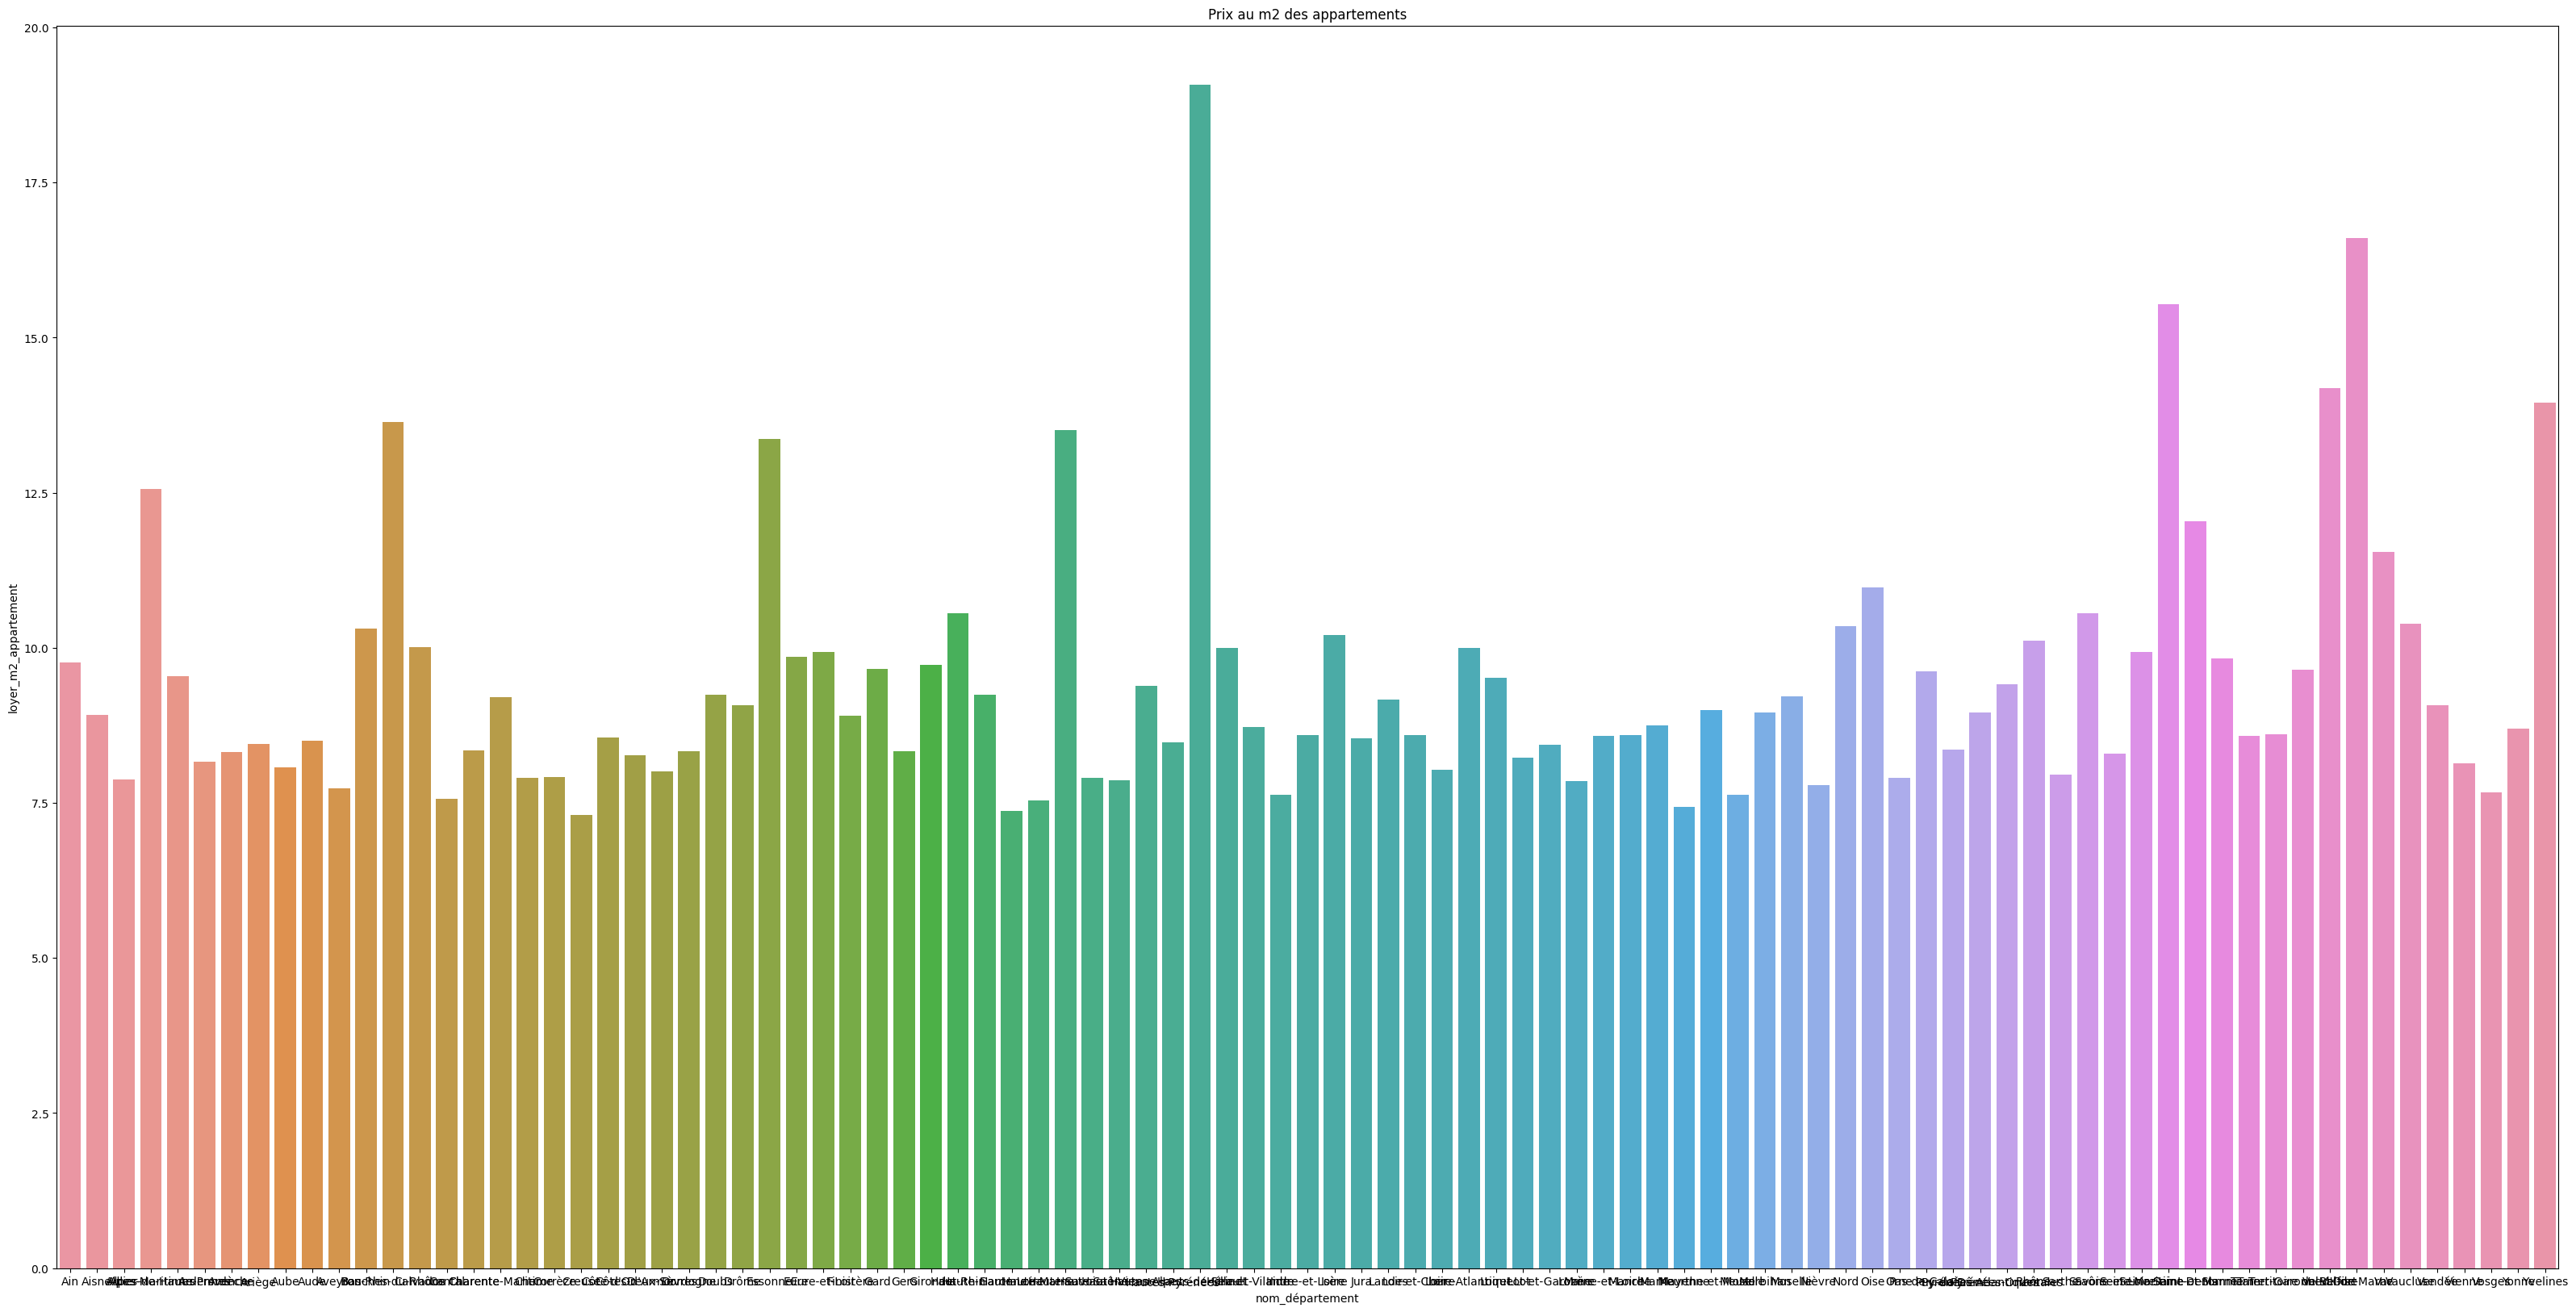

In [ ]:
plt.figure(figsize=(40, 20))
plt.title(label = 'Prix au m2 des appartements')
sns.barplot(x= loyers_geo_gr['nom_département'], y = loyers_geo_gr['loyer_m2_appartement'], data=loyers_geo_gr);